In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg


from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Dense,Flatten

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2,EfficientNetB0,EfficientNetB4,Xception

import warnings
import glob
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/gowda/insat_3d_ds - Sheet.csv")


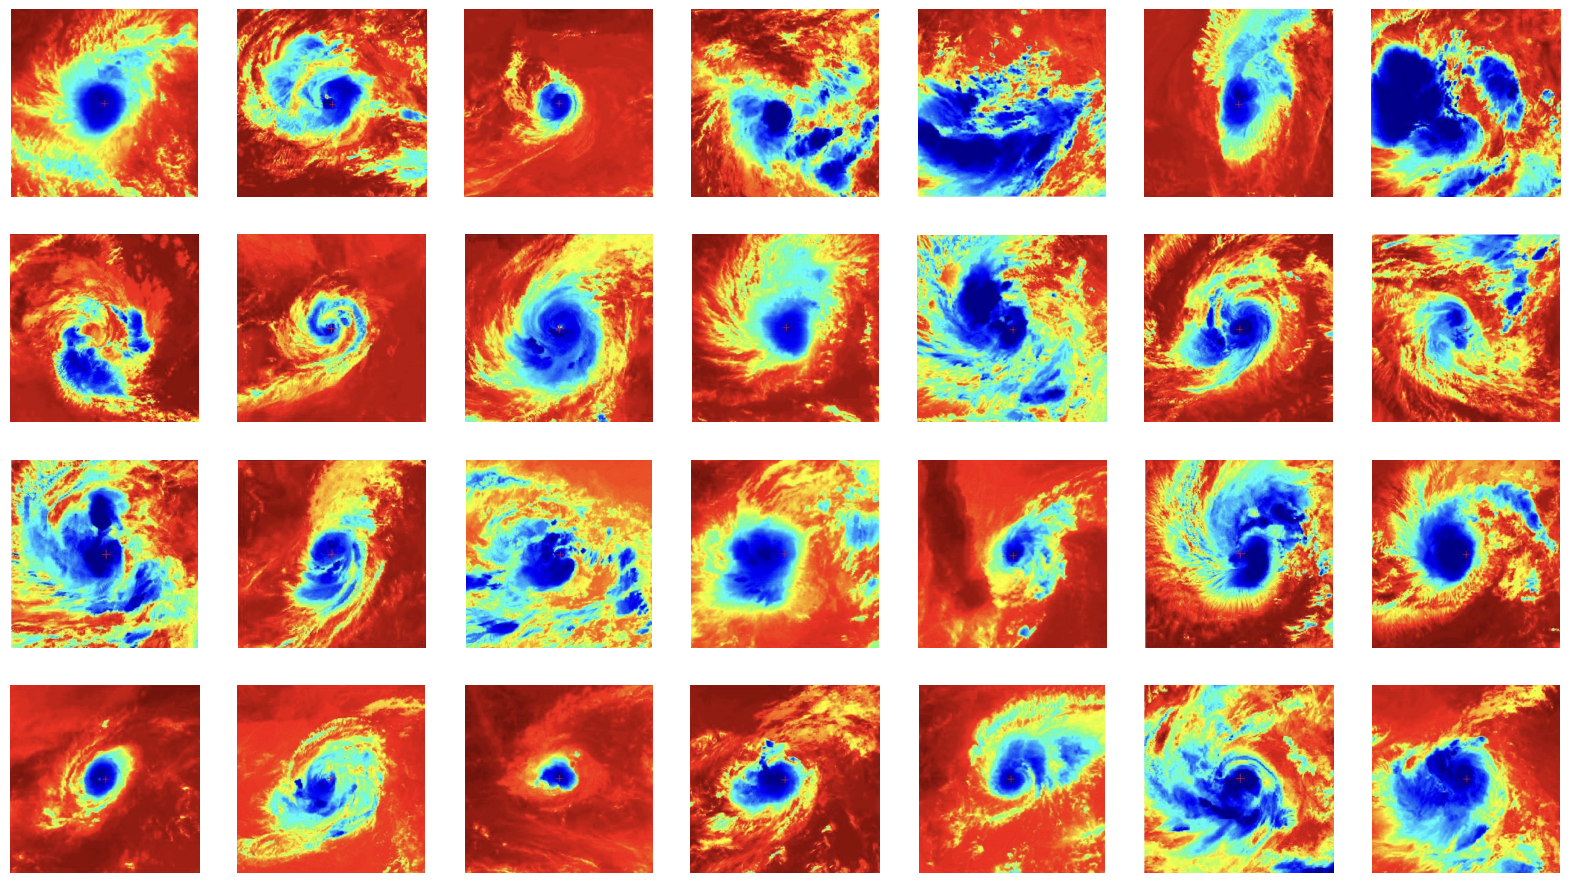

In [ ]:
paths = glob.glob("/content/drive/MyDrive/gowda/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/*.jpg")
plt.figure(figsize=(20, 20))
for i in range(28):
    cur_img = mpimg.imread(paths[i]) 
    ax = plt.subplot(7, 7, i + 1)
    plt.imshow(cur_img.astype("uint8"))
    plt.axis("off")

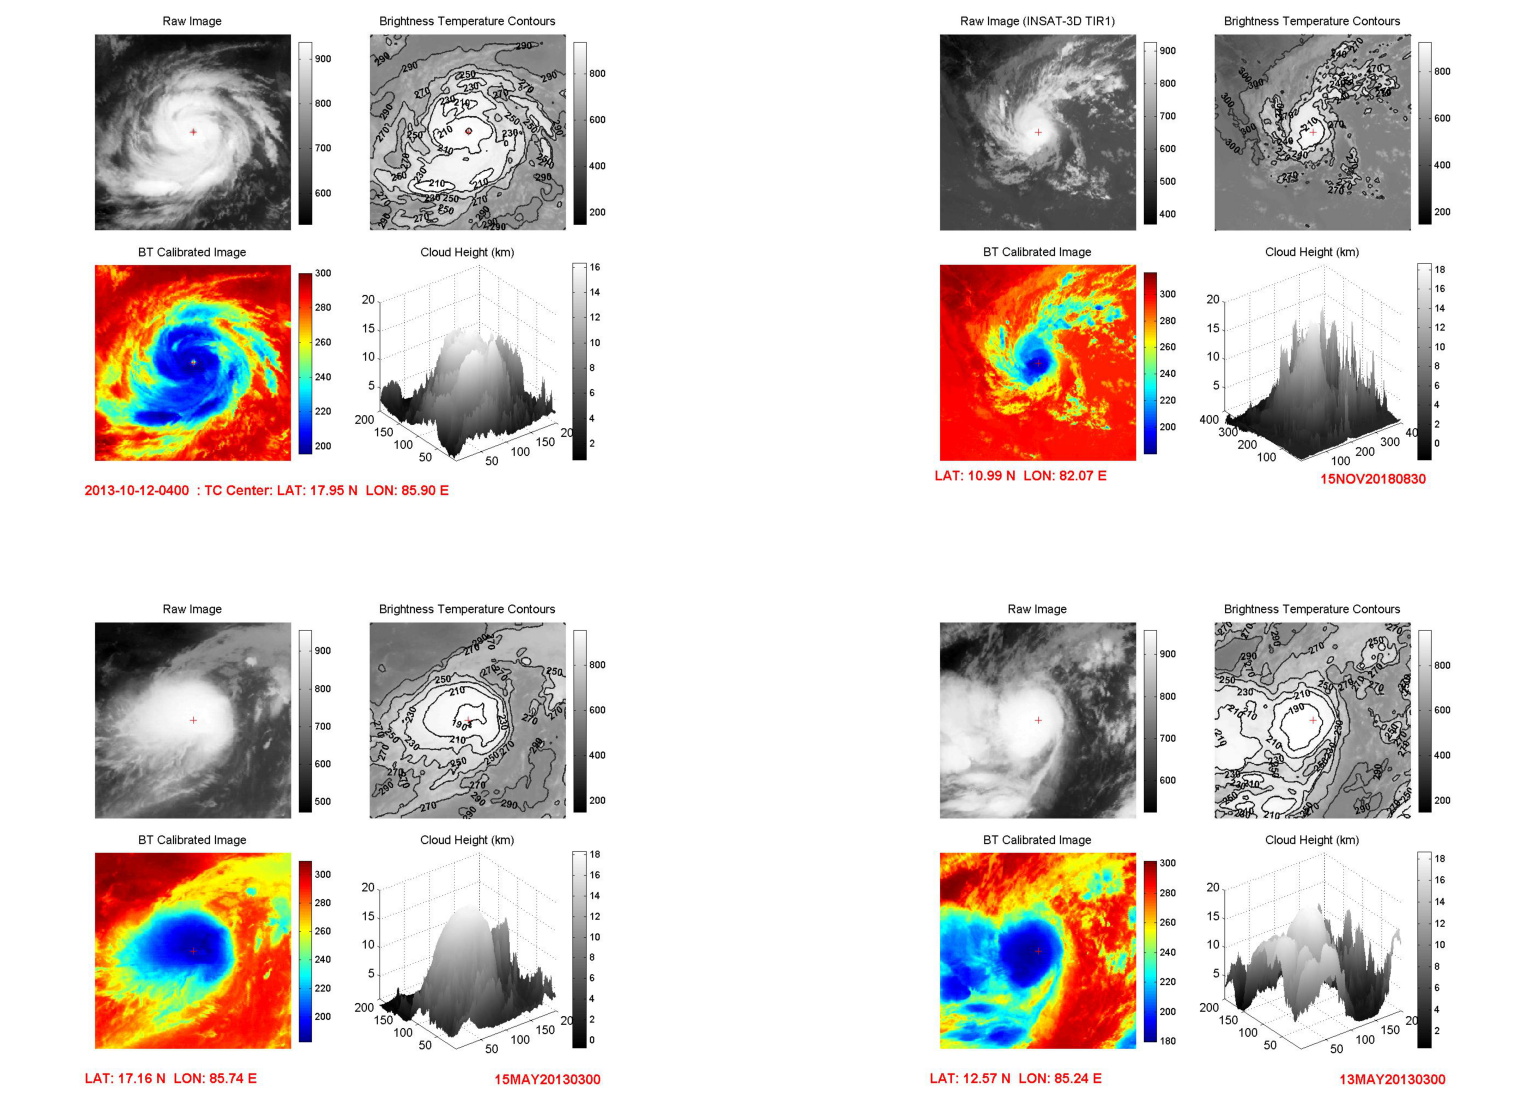

In [ ]:
paths = glob.glob("/content/drive/MyDrive/gowda/insat3d_for_reference_ds/CYCLONE_DATASET/*.jpeg")
plt.figure(figsize=(20, 14))
for i in range(4):
    cur_img = mpimg.imread(paths[i]) 
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(cur_img.astype("uint8"))
    plt.axis("off")

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_data = train_datagen.flow_from_dataframe(train,directory="/content/drive/MyDrive/gowda/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED",subset="training",
                                               x_col="img_name",y_col="label",target_size=(512, 512),batch_size=16,class_mode='raw')


Found 136 validated image filenames.


In [ ]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 512, 512, 3)
(16,)


In [ ]:
def build_model():
    base = tf.keras.applications.Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(512, 512, 3)))

    base.trainable = False

    flatten = base.output
    flatten = Flatten()(flatten)

    bboxHead = Dense(64, activation="relu")(flatten)
    bboxHead = Dense(32, activation="relu")(bboxHead)
    bboxHead = Dense(1, activation="linear")(bboxHead)

    model = Model(inputs=base.input, outputs=bboxHead)
    
    return model

In [ ]:
model = build_model()

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=[tf.keras.metrics.RootMeanSquaredError()])
save_best = tf.keras.callbacks.ModelCheckpoint("/content/drive/Model.h5", monitor='loss',save_best_only=True, verbose=1)

In [ ]:
model.fit(train_data, epochs=50, callbacks=[save_best])

Epoch 1/50
9/9 [==============================] - ETA: 0s - loss: 25.0893 - root_mean_squared_error: 33.0297 
Epoch 1: loss improved from inf to 25.08932, saving model to /content/drive/Model.h5


OSError: ignored

In [ ]:
model = tf.keras.models.load_model('./Model.h5')
model.evaluate(train_data)

9/9 [==============================] - 197s 20s/step - loss: 3.9154 - root_mean_squared_error: 4.9499


[3.9154326915740967, 4.949881553649902]

In [ ]:
pred = model.predict(train_data, verbose=1).round(2)

9/9 [==============================] - 176s 19s/step


In [ ]:
train_data1 = train_datagen.flow_from_dataframe(train,directory="/content/drive/MyDrive/gowda/empty",subset="training",
                                               x_col="img_name",y_col="label",target_size=(512, 512),batch_size=16,class_mode='raw')


Found 1 validated image filenames.


In [ ]:
x=model.predict(train_data1,verbose=1).round(2)

1/1 [==============================] - 1s 1s/step


In [ ]:
x

array([[22.2]], dtype=float32)

In [ ]:
model.save('/content/drive/dgmodel.h5','wb')

OSError: ignored